In [196]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pf
import re
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import cufflinks as cf ## Creates a bonding between plotly and pandas
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
from plotly import __version__
import plotly.graph_objs as go

import plotly
#plotly.tools.set_credentials_file(username = 'abhinandan.arya22' , api_key = 'AbUvAIuThSam6x67N3g1')

init_notebook_mode(connected=True)
cf.go_offline()

In [117]:
times = pd.read_csv("C:/Users/Administrator/Desktop/Visualization/Assignment1/timesData.csv")

In [118]:
times.head()

world_rank                        university_name                   country  \
0          1                     Harvard University  United States of America   
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   

   teaching international  research  citations income total_score  \
0      99.7          72.4      98.7       98.8   34.5        96.1   
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9      -        94.2   

  num_students  student_staff_ratio international_students female_male_ratio  \
0       20,152                  8.9                    25%               NaN   
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011

In [119]:
#times.shape
sns.set_style('dark')

In [120]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [121]:
pd.isnull(times).sum()/times.shape[0]*100

world_rank                0.000000
university_name           0.000000
country                   0.000000
teaching                  0.000000
international             0.000000
research                  0.000000
citations                 0.000000
income                    0.000000
total_score               0.000000
num_students              2.266615
student_staff_ratio       2.266615
international_students    2.573953
female_male_ratio         8.951210
year                      0.000000
dtype: float64

In [122]:
times.describe()

teaching     research    citations  student_staff_ratio         year
count  2603.000000  2603.000000  2603.000000          2544.000000  2603.000000
mean     37.801498    35.910257    60.921629            18.445283  2014.075682
std      17.604218    21.254805    23.073219            11.458698     1.685733
min       9.900000     2.900000     1.200000             0.600000  2011.000000
25%      24.700000    19.600000    45.500000            11.975000  2013.000000
50%      33.900000    30.500000    62.500000            16.100000  2014.000000
75%      46.400000    47.250000    79.050000            21.500000  2016.000000
max      99.700000    99.400000   100.000000           162.600000  2016.000000

In [123]:
pf.ProfileReport(times)

In [124]:
times['world_rank'].nunique()

250

## Universities at Rank 1 from 2011 to 2016

In [126]:
times_top_5=times.groupby('year').head(5)
times_top_5['world_rank'] = times_top_5['world_rank'].astype(int)
times_top_5['total_score'] = times_top_5['total_score'].astype(float)
#times_top_5

In [127]:
times_2 = times_top_5[times_top_5['world_rank']==1]
times_3 = times_2.groupby('university_name').count()
times_3 = times_3.reset_index()
#times_3

In [189]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

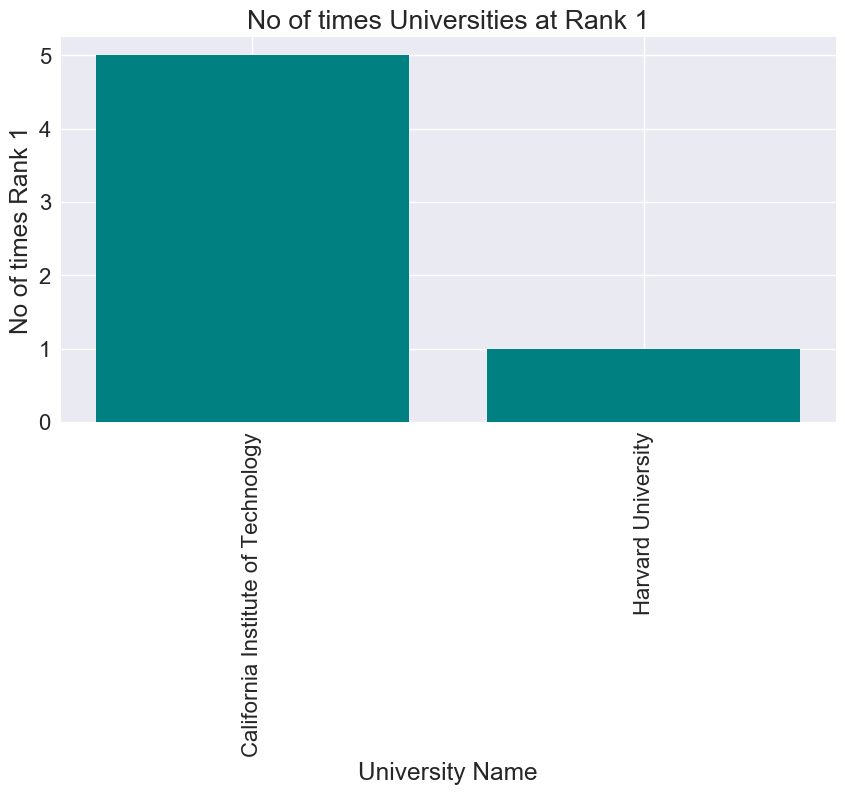

In [193]:
fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.6)
plt.style.use('seaborn-deep')
plt.bar(times_3['university_name'] , times_3['world_rank'], data = times_2, color = 'teal')
plt.xticks(rotation = 90)
plt.xlabel('University Name')
plt.ylabel('No of times Rank 1')
plt.title("No of times Universities at Rank 1")
plt.show()


In [172]:
times = times.dropna(axis =0)

In [173]:
ratio = times['female_male_ratio'].str.split(':' , n = 1 , expand = True)

In [174]:
times['female'] = ratio[0]
times['male'] = ratio[1]

In [175]:
times = times.dropna(axis =0)

In [176]:
times['female'] = times['female'].astype(int)
times['male'] = times['male'].astype(int)

In [177]:
times.world_rank = times.world_rank.str.split("=").str[-1]

In [178]:
times = times.dropna(axis =0)
pd.isnull(times).sum()/times.shape[0]*100

world_rank                0.0
university_name           0.0
country                   0.0
teaching                  0.0
international             0.0
research                  0.0
citations                 0.0
income                    0.0
total_score               0.0
num_students              0.0
student_staff_ratio       0.0
international_students    0.0
female_male_ratio         0.0
year                      0.0
female                    0.0
male                      0.0
dtype: float64

## Countries with maximum universities

In [136]:
highest_stu = times[['country' , 'university_name','year']]

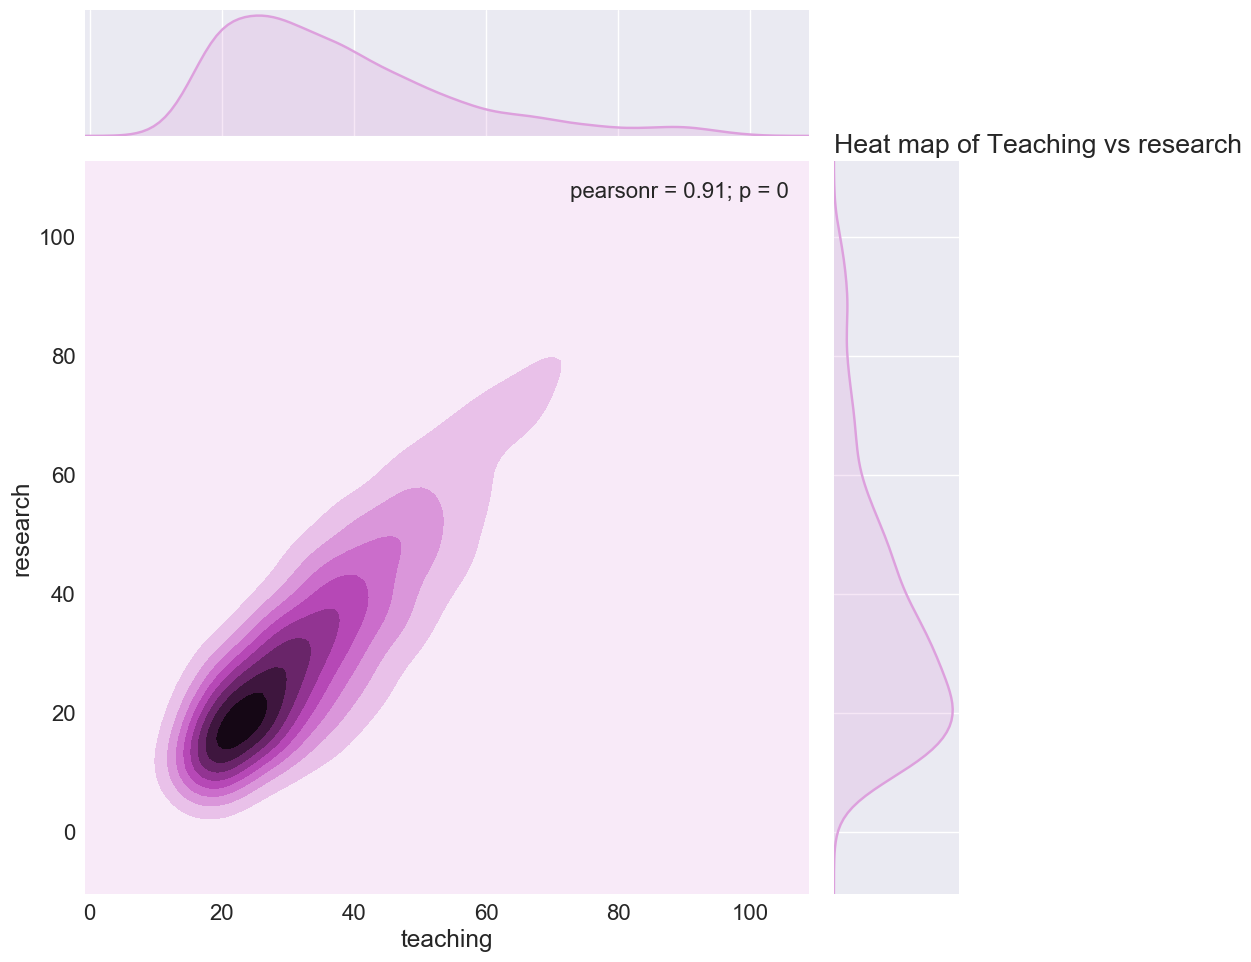

In [194]:
sns.jointplot(x='teaching',y='research',data=times,kind='kde',color='plum', size=10)
plt.title('Heat map of Teaching vs research',loc='left')
plt.show()


In [137]:
highest_stu = highest_stu.groupby(['country','university_name']).count()
#highest_stu

In [138]:
highest_stu = highest_stu.reset_index()
#highest_stu

In [139]:
highest_stu = highest_stu.drop('university_name',axis = 1)
highest_stu = highest_stu.groupby('country').count().reset_index()
highest_stu.columns = ['country','no of universities']

In [140]:
highest_stu = highest_stu.sort_values('no of universities' , ascending=False).head(10)
#highest_stu

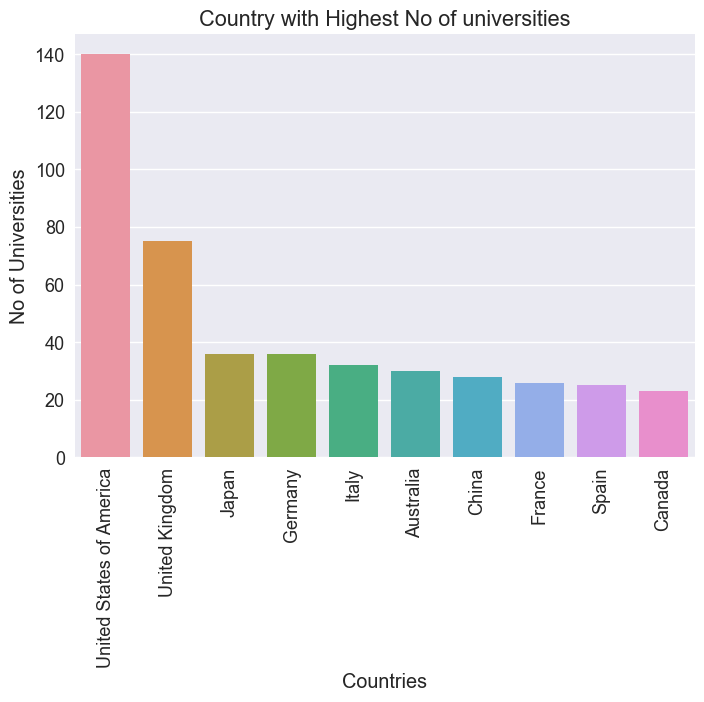

In [141]:
# Top 10 Countries with highest no of universities
sns.set(font_scale=1.3)
#highest_stu['no of universities'].astype(str)
a = sns.barplot(x = 'country' , y = 'no of universities' , data = highest_stu)
plt.xticks(rotation = 90)
plt.xlabel("Countries")
plt.ylabel("No of Universities")
plt.title("Country with Highest No of universities")
plt.show()

In [142]:
times.head()

world_rank                        university_name                   country  \
1          2     California Institute of Technology  United States of America   
2          3  Massachusetts Institute of Technology  United States of America   
3          4                    Stanford University  United States of America   
4          5                   Princeton University  United States of America   
5          6                University of Cambridge            United Kingdom   

   teaching international  research  citations income total_score  \
1      97.7          54.6      98.0       99.9   83.7        96.0   
2      97.8          82.3      91.4       99.9   87.5        95.6   
3      98.3          29.5      98.1       99.2   64.3        94.3   
4      90.9          70.3      95.4       99.9      -        94.2   
5      90.5          77.7      94.1       94.0   57.0        91.2   

  num_students  student_staff_ratio international_students female_male_ratio  \
1        2,243                  6.9                    27%           33 : 67   
2       11,074                  9.0                    33%           37 : 63   
3       15,596                  7.8                    22%           42 : 58   
4        7,929                  8.4                    27%           45 : 55   
5       18,812                 11.8                    34%           46 : 54   

   year  female  male  
1  2011      33    67  
2  2011      37    63  
3  2011      42    58  
4  2011      45    55  
5  2011      46    54

## Co-Relation with respect to Teaching and Research

In [143]:
times_cor = times.corr()

In [144]:
times.iplot(kind = 'scatter' , x ='teaching' , y = 'research' , mode = 'markers'  , colors = 'red' , 
            title='Teaching v/s Research' , xTitle = 'Teaching', yTitle = 'Research')


## University with Highest Teaching Score from 2011 to 2016

In [145]:
times_re = times[['country','university_name','teaching','research']]

In [146]:
times_re = times_re.sort_values(['teaching','research'], ascending=False)

In [147]:
times_re= times_re.drop_duplicates(subset=['university_name'])

In [148]:
times_re =times_re.head(10)
times_re['range1'] = np.arange(len(times_re))

No handles with labels found to put in legend.


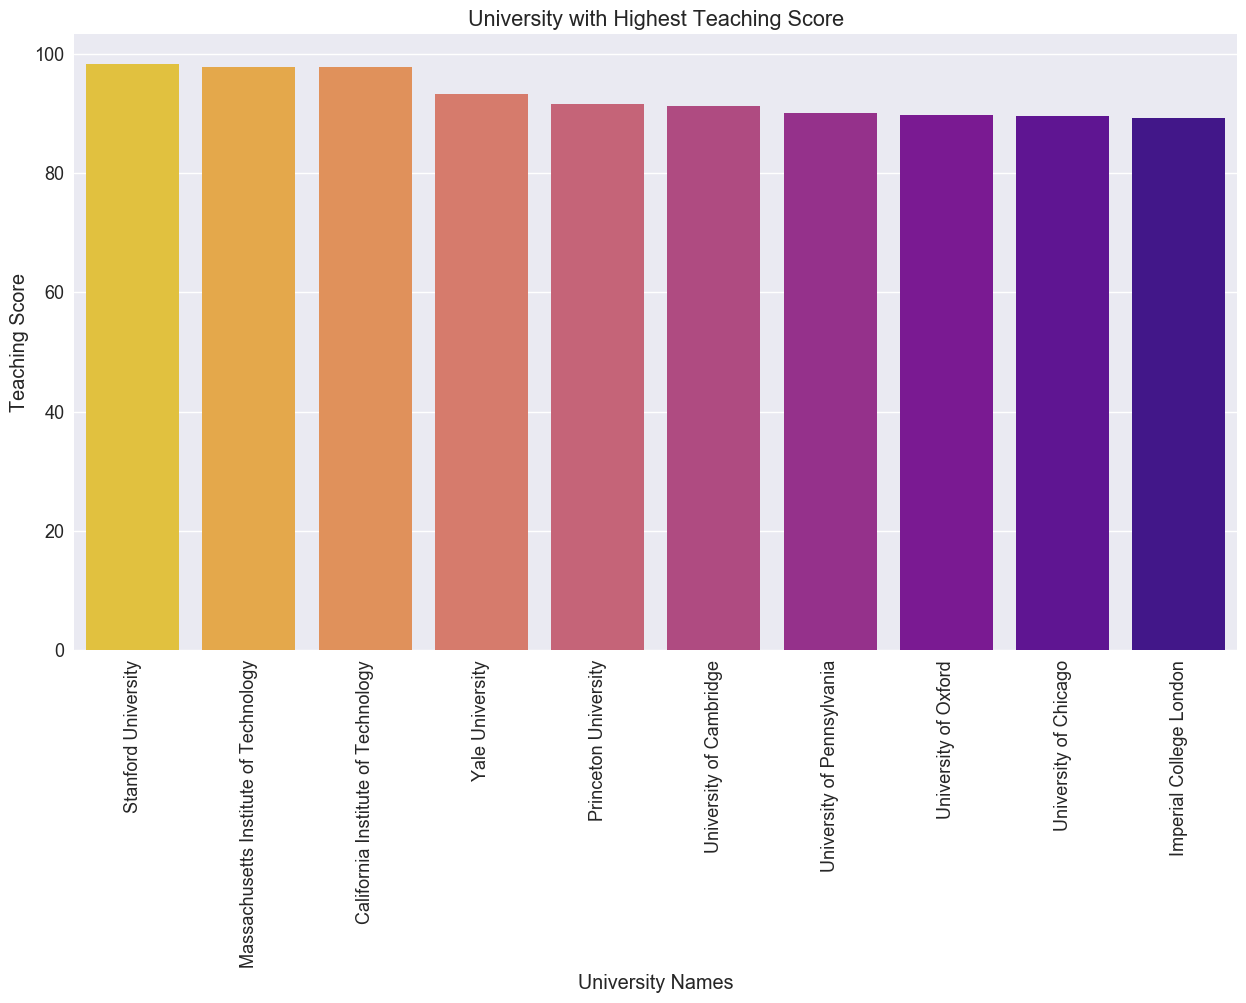

In [149]:
sns.set(font_scale=1.3)
fig = plt.figure(figsize=(15,8))
sns.barplot(x = 'university_name' , y = 'teaching' , data = times_re , palette='plasma_r')
plt.xticks(rotation = 90)
plt.xlabel('University Names')
plt.ylabel('Teaching Score')
plt.title('University with Highest Teaching Score')
plt.legend()
plt.show()

In [150]:
male_female = times[['university_name' , 'female' , 'male' ,'year']]
#times

In [151]:
male_female = male_female.sort_values('female',ascending=False)

In [152]:
male_female1 = male_female.head()

In [153]:
male_female2 = male_female.tail()

In [154]:
male_female1 = male_female1.append(male_female2)

In [155]:
male_female1

university_name  female  male  year
1760                    Ewha Womans University     100     0  2015
2227                    Ewha Womans University     100     0  2016
2413                        Anadolu University      78    22  2016
2388                        Soochow University      78    22  2016
2036                  Royal Veterinary College      77    23  2016
579        Polytechnic University of Catalonia      12    88  2012
2272       Polytechnic University of Catalonia      12    88  2016
2501            Kyushu Institute of Technology      11    89  2016
2582        Toyohashi University of Technology       9    91  2016
2536  Pontifical Catholic University of Paraná       1    99  2016

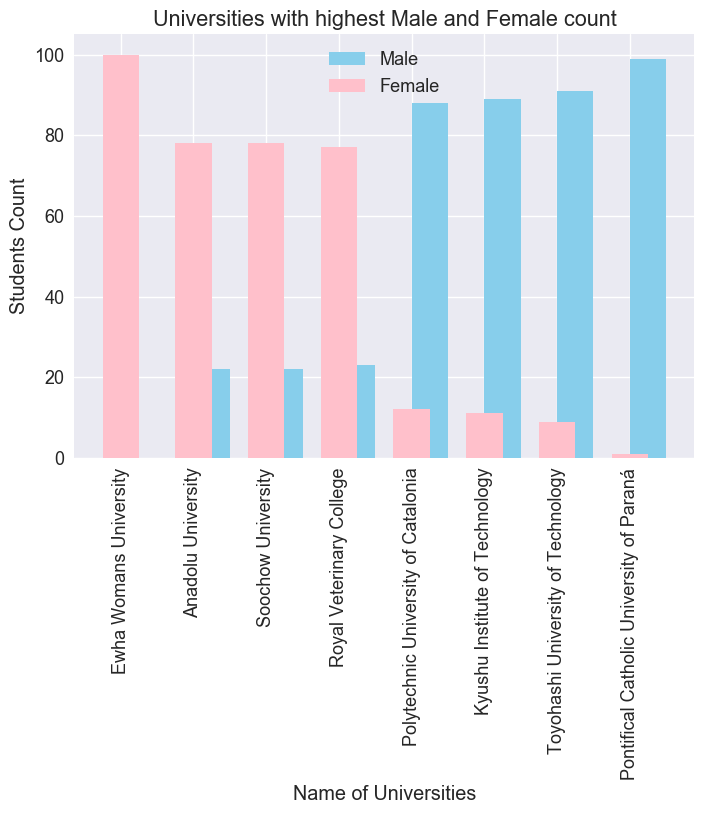

In [156]:
# uiversities with heighest no of males and females
plt.bar(male_female1['university_name'],male_female1['male'],align = 'edge',width = 0.5 ,color = 'skyblue' , label = 'Male')
plt.xticks(rotation = 90)
plt.bar(male_female1['university_name'],male_female1['female'] ,align = 'center' , width = 0.5 , color = 'pink',label = 'Female')
plt.xticks(rotation = 90)
plt.legend()
plt.xlabel('Name of Universities')
plt.ylabel('Students Count')
plt.title('Universities with highest Male and Female count')
plt.show()

In [157]:
times2015 = times[times['year']==2015]
times2016 = times[times['year']==2016]

In [158]:
times2015 = times2015.sort_values('total_score' , ascending = False).head()
times2016 = times2016.sort_values('total_score' , ascending = False).head()

In [159]:
#times2015['total_score'] = times2015['total_score'].astype(float)
#times2016['total_score'] = times2016['total_score'].astype(float)
times2015['total_score'] = times2015['total_score'].astype(float)
times2015['male'] = times2015['male'].astype(int)
times2015['female'] = times2015['female'].astype(int)
times2016['total_score'] = times2016['total_score'].astype(float)
times2016['male'] = times2016['male'].astype(int)
times2016['female'] = times2016['female'].astype(int)
times2015

world_rank                        university_name  \
1402          1     California Institute of Technology   
1404          3                   University of Oxford   
1405          4                    Stanford University   
1406          5                University of Cambridge   
1407          6  Massachusetts Institute of Technology   

                       country  teaching international  research  citations  \
1402  United States of America      92.2          67.0      98.1       99.7   
1404            United Kingdom      88.6          90.7      97.7       95.5   
1405  United States of America      91.5          69.0      96.7       99.1   
1406            United Kingdom      89.7          87.8      95.6       95.2   
1407  United States of America      89.1          84.3      88.2      100.0   

     income  total_score num_students  student_staff_ratio  \
1402   89.1         94.3        2,243                  6.9   
1404   72.9         93.2       19,919                 11.6   
1405   63.1         92.9       15,596                  7.8   
1406   51.1         92.0       18,812                 11.8   
1407   95.7         91.9       11,074                  9.0   

     international_students female_male_ratio  year  female  male  
1402                    27%           33 : 67  2015      33    67  
1404                    34%           46 : 54  2015      46    54  
1405                    22%           42 : 58  2015      42    58  
1406                    34%           46 : 54  2015      46    54  
1407                    33%           37 : 63  2015      37    63

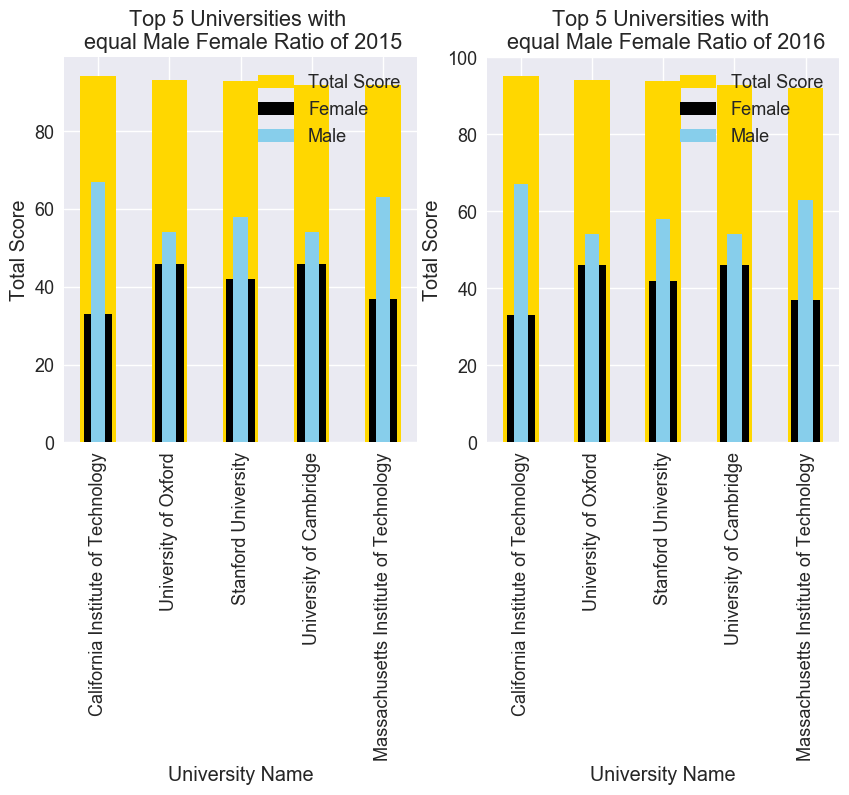

In [160]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.set(font_scale=1.3)
plt.bar(times2015['university_name'] , times2015['total_score'], data = times2015 ,width =0.5 ,label = 'Total Score', color = 'gold')
plt.bar(times2015['university_name'] , times2015['female'], data = times2015 , width = 0.4 , label = 'Female' , color = 'black')
plt.bar(times2015['university_name'] , times2015['male'], data = times2015 , width = 0.2 , label = 'Male', color = 'skyblue')
plt.xticks(rotation = 90)
plt.xlabel('University Name')
plt.ylabel('Total Score')
plt.title("Top 5 Universities with \n equal Male Female Ratio of 2015")

plt.legend()
plt.subplot(1,2,2)
plt.bar(times2016['university_name'] , times2016['total_score'], data = times2016 ,width =0.5 ,label = 'Total Score' , color = 'gold')
plt.bar(times2016['university_name'] , times2016['female'], data = times2016 , width = 0.4 , label = 'Female' , color = 'black')
plt.bar(times2016['university_name'] , times2016['male'], data = times2016 , width = 0.2 , label = 'Male', color = 'skyblue')
plt.xticks(rotation = 90)
plt.xlabel('University Name')
plt.ylabel('Total Score')
plt.title("Top 5 Universities with \n equal Male Female Ratio of 2016")

plt.legend()
plt.show()



In [161]:
times2013 = times[times['year']==2013]
times2014 = times[times['year']==2014]
times2013 = times2013.sort_values('total_score' , ascending = False).head()
times2014 = times2014.sort_values('total_score' , ascending = False).head()
times2013['total_score'] = times2013['total_score'].astype(float)
times2013['male'] = times2013['male'].astype(int)
times2013['female'] = times2013['female'].astype(int)
times2014['total_score'] = times2014['total_score'].astype(float)
times2014['male'] = times2014['male'].astype(int)
times2014['female'] = times2014['female'].astype(int)

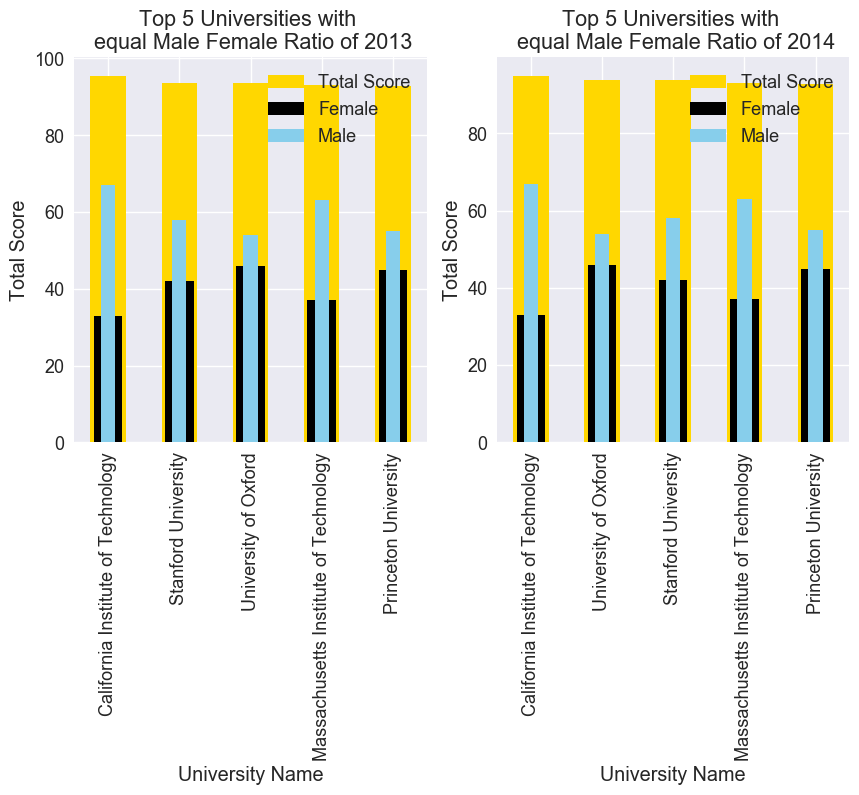

In [162]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(times2013['university_name'] , times2013['total_score'], data = times2013 ,width =0.5 ,label = 'Total Score', color = 'gold')
plt.bar(times2013['university_name'] , times2013['female'], data = times2013 , width = 0.4 , label = 'Female' , color = 'black')
plt.bar(times2013['university_name'] , times2013['male'], data = times2013 , width = 0.2 , label = 'Male' , color= 'skyblue')
plt.xticks(rotation = 90)
plt.xlabel('University Name')
plt.ylabel('Total Score')
plt.title("Top 5 Universities with \n equal Male Female Ratio of 2013")
plt.legend()
plt.subplot(1,2,2)
plt.bar(times2014['university_name'] , times2014['total_score'], data = times2014 ,width =0.5 ,label = 'Total Score', color = 'gold')
plt.bar(times2014['university_name'] , times2014['female'], data = times2014 , width = 0.4 , label = 'Female' , color='black')
plt.bar(times2014['university_name'] , times2014['male'], data = times2014 , width = 0.2 , label = 'Male', color = 'skyblue')
plt.xticks(rotation = 90)
plt.xlabel('University Name')
plt.ylabel('Total Score')
plt.title("Top 5 Universities with \n equal Male Female Ratio of 2014")

plt.legend()
plt.show()

In [163]:
times2011 = times[times['year']==2011]
times2012 = times[times['year']==2012]
times2011 = times2011.sort_values('total_score' , ascending = False).head()
times2012 = times2012.sort_values('total_score' , ascending = False).head()
times2011['total_score'] = times2011['total_score'].astype(float)
times2012['total_score'] = times2012['total_score'].astype(float)
times2011['total_score'] = times2011['total_score'].astype(float)
times2011['male'] = times2011['male'].astype(int)
times2011['female'] = times2011['female'].astype(int)
times2012['total_score'] = times2012['total_score'].astype(float)
times2012['male'] = times2012['male'].astype(int)
times2012['female'] = times2012['female'].astype(int)

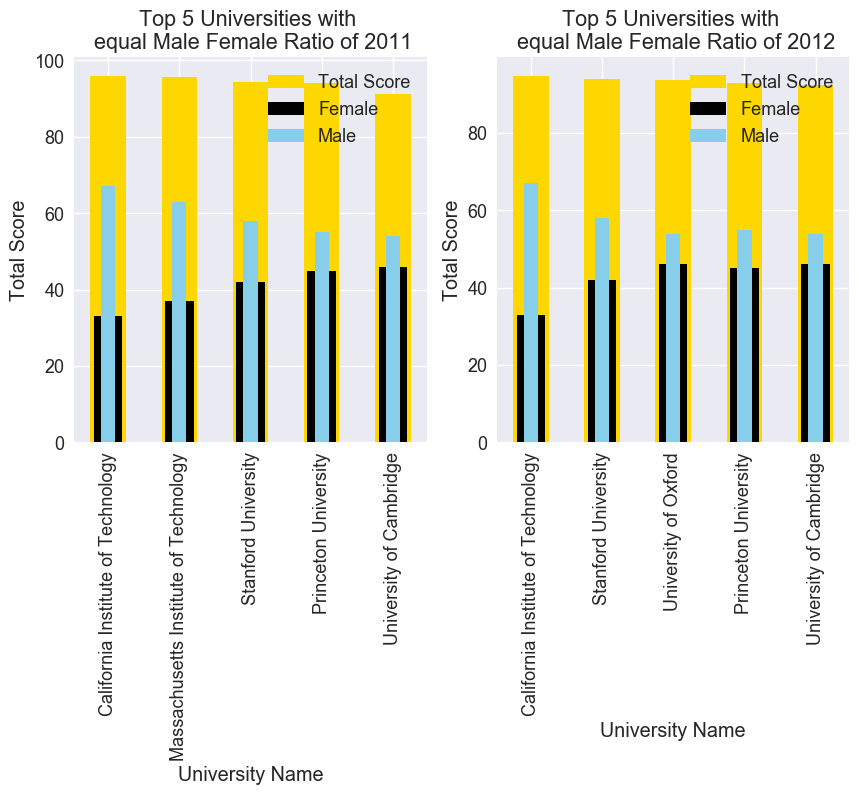

In [164]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(times2011['university_name'] , times2011['total_score'], data = times2011 ,width =0.5 ,label = 'Total Score',color ='gold')
plt.bar(times2011['university_name'] , times2011['female'], data = times2011 , width = 0.4 , label = 'Female',color = 'black')
plt.bar(times2011['university_name'] , times2011['male'], data = times2011 , width = 0.2 , label = 'Male' , color ='skyblue')
plt.xticks(rotation = 90)
plt.legend()
plt.xlabel('University Name')
plt.ylabel('Total Score')
plt.title("Top 5 Universities with \n equal Male Female Ratio of 2011")
plt.subplot(1,2,2)
plt.bar(times2012['university_name'] , times2012['total_score'], data = times2012 ,width =0.5 ,label = 'Total Score' , color ='gold')
plt.bar(times2012['university_name'] , times2012['female'], data = times2012 , width = 0.4 , label = 'Female', color = 'black')
plt.bar(times2012['university_name'] , times2012['male'], data = times2012 , width = 0.2 , label = 'Male' , color = 'skyblue')
plt.xticks(rotation = 90)
plt.xlabel('University Name')
plt.ylabel('Total Score')
plt.title("Top 5 Universities with \n equal Male Female Ratio of 2012")
plt.legend()
plt.show()

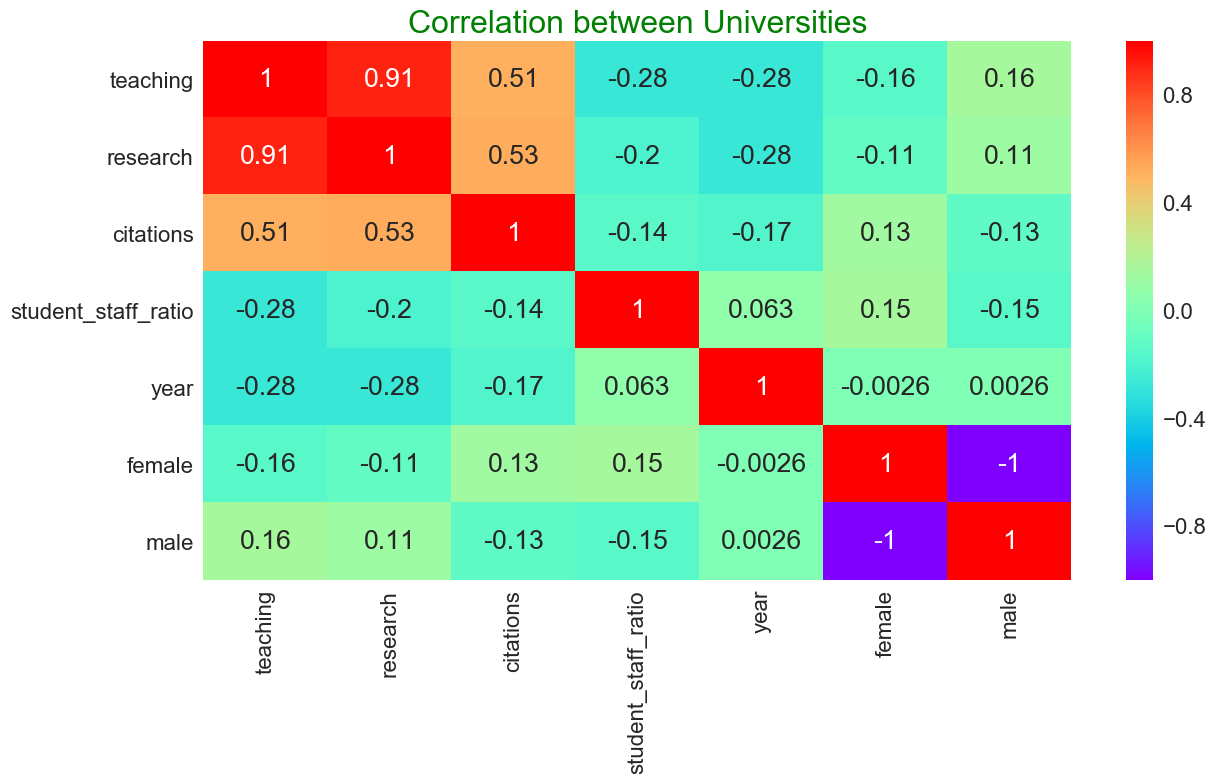

In [195]:
plt.figure(figsize=(14,7))
sns.heatmap(times.corr(),annot=True,cmap='rainbow')
plt.title('Correlation between Universities',color='green',fontsize='large')
plt.show()